In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
files = []
for i in range(29):
    tempdf = pd.read_csv(f'data/User{i+1}.csv', delimiter = ',')
    tempdf['User'] = i
    files.append(tempdf)
df = pd.concat(files, ignore_index = True)

In [130]:
df

Game Completed Date      Team Outcome  Task Completed  \
0      12/13/2020 at 1:26:56 am EST  Crewmate     Win             3.0   
1      12/13/2020 at 1:17:42 am EST  Crewmate    Loss             7.0   
2     12/13/2020 at 12:57:47 am EST  Crewmate     Win             3.0   
3     12/13/2020 at 12:41:55 am EST  Imposter     Win             NaN   
4     12/13/2020 at 12:30:37 am EST  Crewmate    Loss             4.0   
...                             ...       ...     ...             ...   
2222  12/01/2020 at 11:07:41 am EST  Imposter    Loss             NaN   
2223  12/01/2020 at 10:52:25 am EST  Crewmate     Win             7.0   
2224  11/26/2020 at 11:23:14 am EST  Crewmate     Win             7.0   
2225  11/26/2020 at 11:00:36 am EST  Crewmate     Win             7.0   
2226  11/26/2020 at 10:48:50 am EST  Crewmate     Win             7.0   

     All Tasks Completed Murdered  Imposter Kills  Game Length Ejected  \
0                     No      Yes             NaN        424.0      No   
1                    Yes       No             NaN        981.0      No   
2                     No       No             NaN        693.0      No   
3                      -        -             2.0        485.0      No   
4                     No       No             NaN        310.0      No   
...                  ...      ...             ...          ...     ...   
2222                   -        -             2.0        850.0      No   
2223                 Yes       No             NaN        851.0      No   
2224                 Yes       No             NaN       1185.0      No   
2225                 Yes       No             NaN        618.0      No   
2226                 Yes       No             NaN       1177.0      No   

      Sabotages Fixed  Time to complete all tasks Rank Change  \
0                 2.0                         0.0          ++   
1                 1.0                       588.0          --   
2                 0.0                         0.0          ++   
3                 NaN                         0.0         +++   
4                 0.0                         0.0         ---   
...               ...                         ...         ...   
2222              NaN                         0.0           -   
2223              1.0                       850.0          ++   
2224              1.0                       916.0          ++   
2225              0.0                       373.0          ++   
2226              1.0                       962.0          ++   

     Region/Game Code  User   Region  
0         NA / WYMSBF     0      NA   
1         NA / WYMSBF     0      NA   
2         NA / WYMSBF     0      NA   
3     Europe / QIRTNF     0  Europe   
4     Europe / QIRTNF     0  Europe   
...               ...   ...      ...  
2222      NA / SNNGZF    28      NA   
2223      NA / SNNGZF    28      NA   
2224  Europe / NZWLXQ    28  Europe   
2225  Europe / NZWLXQ    28  Europe   
2226  Europe / NZWLXQ    28  Europe   

[2227 rows x 15 columns]

In [86]:
df.dtypes

Game Completed Date            object
Team                           object
Outcome                        object
Task Completed                 object
All Tasks Completed            object
Murdered                       object
Imposter Kills                 object
Game Length                    object
Ejected                        object
Sabotages Fixed               float64
Time to complete all tasks     object
Rank Change                    object
Region/Game Code               object
User                            int64
dtype: object

In [87]:
df[['Task Completed', 'Imposter Kills']] = df[['Task Completed', 'Imposter Kills']].apply(pd.to_numeric, errors = 'coerce')

In [88]:
df['Region'] = df['Region/Game Code'].str.extract(r'^(.*?)/')
df['Region'].value_counts()


NA         1436
Europe      791
Name: Region, dtype: int64

In [89]:
df['Game Length'] = df['Game Length'].apply(pd.to_timedelta)
df['Game Length'] = df['Game Length'] / np.timedelta64(1, 's')

In [90]:
df['Time to complete all tasks'] = df['Time to complete all tasks'].apply(pd.to_timedelta, errors = 'coerce')
df['Time to complete all tasks'] = df['Time to complete all tasks'] / np.timedelta64(1, 's')

In [91]:
crewmate = df[['Team',
               'Outcome',
               'Task Completed',
               'All Tasks Completed',
               'Murdered',
               'Game Length',
               'Ejected',
              'Sabotages Fixed',
              'Region',
              'User']][df['Team'] == 'Crewmate']
crewmate.head()

Team Outcome  Task Completed All Tasks Completed Murdered  Game Length  \
0  Crewmate     Win             3.0                  No      Yes        424.0   
1  Crewmate    Loss             7.0                 Yes       No        981.0   
2  Crewmate     Win             3.0                  No       No        693.0   
4  Crewmate    Loss             4.0                  No       No        310.0   
5  Crewmate    Loss             7.0                 Yes      Yes        982.0   

  Ejected  Sabotages Fixed   Region  User  
0      No              2.0      NA      0  
1      No              1.0      NA      0  
2      No              0.0      NA      0  
4      No              0.0  Europe      0  
5      No              0.0  Europe      0

In [92]:
crewmate['Outcome'] = crewmate['Outcome'].replace(['Loss', 'Win'],[0, 1])
crewmate['All Tasks Completed'] = crewmate['All Tasks Completed'].replace(['No', 'Yes'],[0, 1])
crewmate['Murdered'] = crewmate['Murdered'].replace(['No', 'Yes'],[0, 1])
crewmate['Ejected'] = crewmate['Ejected'].replace(['No', 'Yes'],[0, 1])
crewmate['Region'] = crewmate['Region'].replace(['NA ', 'Europe '],[0, 1])
crewmate.head()

Team  Outcome  Task Completed  All Tasks Completed  Murdered  \
0  Crewmate        1             3.0                    0         1   
1  Crewmate        0             7.0                    1         0   
2  Crewmate        1             3.0                    0         0   
4  Crewmate        0             4.0                    0         0   
5  Crewmate        0             7.0                    1         1   

   Game Length  Ejected  Sabotages Fixed  Region  User  
0        424.0        0              2.0       0     0  
1        981.0        0              1.0       0     0  
2        693.0        0              0.0       0     0  
4        310.0        0              0.0       1     0  
5        982.0        0              0.0       1     0

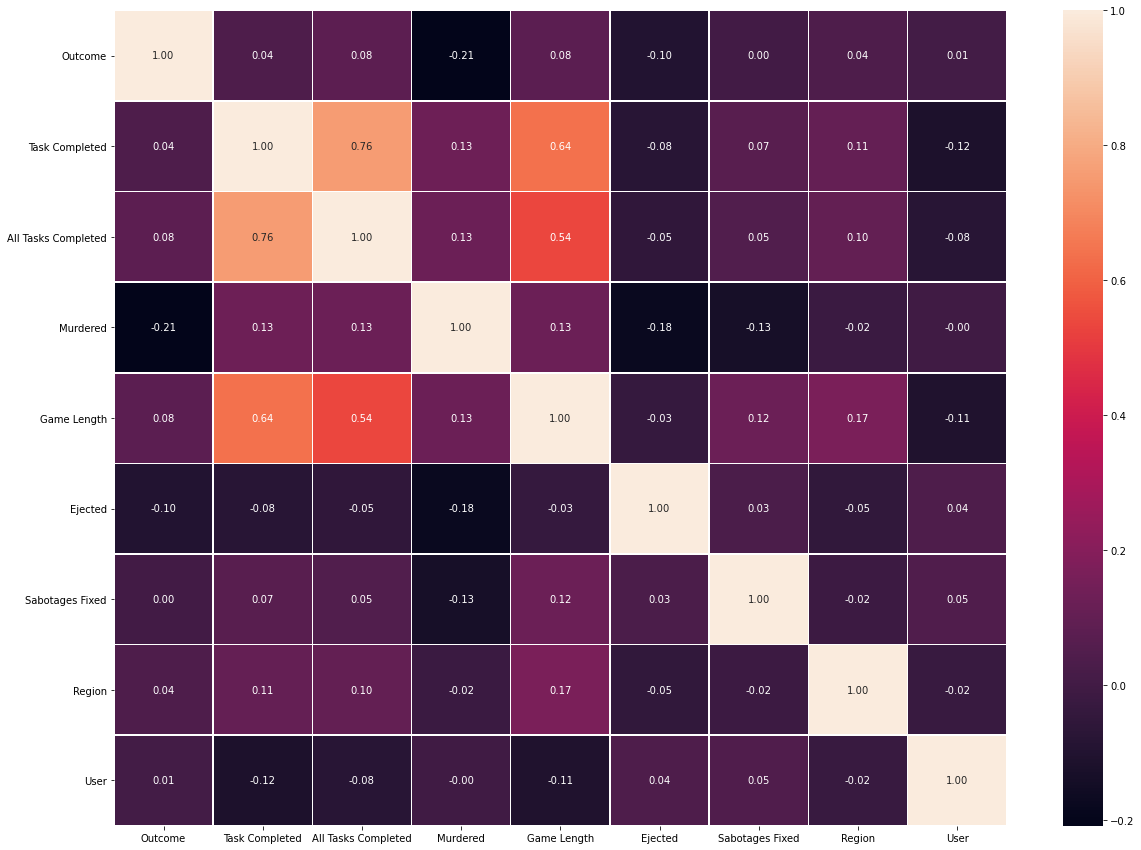

In [93]:
%matplotlib inline
corrlation_matrix = crewmate.corr()
fig, ax = plt.subplots(figsize = (20, 15))
ax = sns.heatmap(corrlation_matrix,
                annot = True,
                linewidths = 0.5,
                fmt = ".2f")

In [94]:
crewmate = crewmate.drop(['All Tasks Completed'], axis =1)

In [95]:
crewmate.head()

Team  Outcome  Task Completed  Murdered  Game Length  Ejected  \
0  Crewmate        1             3.0         1        424.0        0   
1  Crewmate        0             7.0         0        981.0        0   
2  Crewmate        1             3.0         0        693.0        0   
4  Crewmate        0             4.0         0        310.0        0   
5  Crewmate        0             7.0         1        982.0        0   

   Sabotages Fixed  Region  User  
0              2.0       0     0  
1              1.0       0     0  
2              0.0       0     0  
4              0.0       1     0  
5              0.0       1     0

In [96]:
def user_train_valid_split(users_i,valid_ratio,possible=False):
    n = sum(users_i)
    target = int(np.floor(valid_ratio*n))
    while not possible:
        possible, validation_indices = user_split(users_i,target)
        target -= 1
    training_indices = [i for i in range(len(users_i)) if i not in validation_indices]
    return training_indices, validation_indices

def user_split(users_i,target):  
    # Reference: https://levelup.gitconnected.com/dynamic-programming-subset-sum-c386126621cd
    n = len(users_i)
    solution = [[False for j in range(int(target+1))] for i in range(n+1)]
    # base cases
    for i in range(n):
        solution[i][0] = True
    # other cases
    for i in range(1,n+1):
        for j in range(1,target+1):
            solution[i][j] = solution[i-1][j]
            if(solution[i][j] == False and j >= users_i[i-1]):
                solution[i][j] = solution[i][j] or solution[i-1][j-users_i[i-1]]
    # check if the subset sum is possible
    possible = solution[len(users_i)][target]
    subset = []
    if not possible: return possible, subset
    # return the subset solution if one exists
    y = len(users_i)
    x = target
    while x != 0:
        if solution[y-1][x] == False:
            subset.append(y-1)
            x -= users_i[y-1]
        else: 
            y -= 1
    return possible, subset

In [97]:
crewmates_i = list(crewmate["User"].value_counts(sort = False))
test_ratio = .25
training_indices, test_indices = user_train_valid_split(crewmates_i,test_ratio)

#check
train_sum = sum([crewmates_i[i] for i in training_indices])
test_sum = sum([crewmates_i[i] for i in test_indices])
print("expected valid ratio: {}, actual: {}".format(test_ratio, test_sum/(train_sum+test_sum)))

train_data = crewmate.loc[crewmate['User'].isin(training_indices)]
test_data = crewmate.loc[crewmate['User'].isin(test_indices)]
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

expected valid ratio: 0.25, actual: 0.2498580352072686


In [98]:
train_data

Team  Outcome  Task Completed  Murdered  Game Length  Ejected  \
0     Crewmate        1             3.0         1        424.0        0   
1     Crewmate        0             7.0         0        981.0        0   
2     Crewmate        1             3.0         0        693.0        0   
3     Crewmate        0             4.0         0        310.0        0   
4     Crewmate        0             7.0         1        982.0        0   
...        ...      ...             ...       ...          ...      ...   
1316  Crewmate        0             5.0         0        660.0        1   
1317  Crewmate        1             7.0         0        851.0        0   
1318  Crewmate        1             7.0         0       1185.0        0   
1319  Crewmate        1             7.0         0        618.0        0   
1320  Crewmate        1             7.0         0       1177.0        0   

      Sabotages Fixed  Region  User  
0                 2.0       0     0  
1                 1.0       0     0  
2                 0.0       0     0  
3                 0.0       1     0  
4                 0.0       1     0  
...               ...     ...   ...  
1316              2.0       1    28  
1317              1.0       0    28  
1318              1.0       1    28  
1319              0.0       1    28  
1320              1.0       1    28  

[1321 rows x 9 columns]

In [120]:
X_train

Task Completed  Murdered  Game Length  Ejected  Sabotages Fixed  Region
0                3.0         1        424.0        0              2.0       0
1                7.0         0        981.0        0              1.0       0
2                3.0         0        693.0        0              0.0       0
3                4.0         0        310.0        0              0.0       1
4                7.0         1        982.0        0              0.0       1
...              ...       ...          ...      ...              ...     ...
1316             5.0         0        660.0        1              2.0       1
1317             7.0         0        851.0        0              1.0       0
1318             7.0         0       1185.0        0              1.0       1
1319             7.0         0        618.0        0              0.0       1
1320             7.0         0       1177.0        0              1.0       1

[1321 rows x 6 columns]

### Logistic Regression

<BarContainer object of 6 artists>

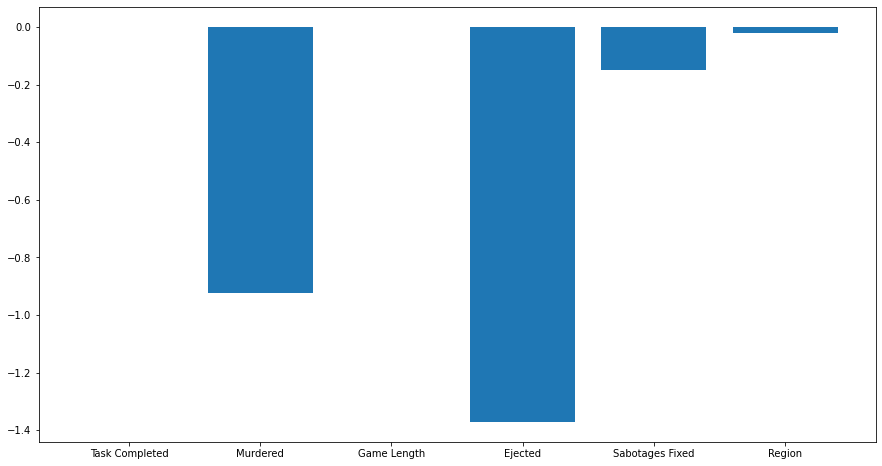

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

#train data
X_train = train_data.drop(["Outcome", "Team", "User"], axis=1)
y_train = train_data["Outcome"]
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
coefs = clf.coef_[0]

plt.figure(figsize=(15,8))
plt.bar(X_train.columns, coefs)
plt.y_axis

In [129]:
# test data
X_test = test_data.drop(["Outcome", "Team", "User"], axis=1)
y_true = test_data["Outcome"]
y_predict = clf.predict(X_test)

auc = roc_auc_score(y_true, y_predict)
print("AUC:", auc)

0.6136017272034544